In [1]:
import pandas as pd
import numpy as np
import re

# Ignore the warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

## Upload the Data

In [2]:
df = pd.read_csv("computer_science_education_user_survey.csv")
df.head(3)

,Timestamp,Username,What is your background in Computer Science?,How confident are you with the basics of Computer Science fundamentals?,What platforms do you currently use to study Computer Science?,What features do you look for in a Computer Science course?,Have you ever purchased an online CS course?,How much would you be willing to spend on a premium monthly subscription for a Computer Science course?,What would you say is your learning style?,"In the courses you've taken, do you find illustrations, animations, and/or icons distracting or helpful to your understanding of the subject at hand?","When a course offers a quiz at the end of each lesson/course, do you feel this reinforces your understanding of the content?","Would you be comfortable staying in contact with illustratedJS, including being interviewed to help in our User Testing phase?"
0,2020/10/07 3:42:39 PM AST,barbaraloismoore@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,No,Up to $20,Visual,Helpful,Yes,Yes
1,2020/10/07 3:44:56 PM AST,duellrdh@gmail.com,Bootcamp,3,Youtube;CodeCademy;Leet Code;CodeSignal;Lambda...,Videos in your CS language;Documented code;Vis...,Yes,Up to $35,Read & Write,Helpful,Yes,Yes
2,2020/10/07 3:47:04 PM AST,christine.fletcher0101@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,Yes,$0 - $10,Auditory,Helpful,Yes,Yes


## Wrangle the Data

### Let's change the column names to something shorter and easier to read.

New column names: Timestamp, Username, Background_CS, Confidence_CS, Platforms_CS, 
                  Features_CS, Purchased, Max_Amount, Learning_Style, Visual _Materials,
                  Quiz_Importance, Cooperativness.

In [3]:
df_new = df.rename(columns = {'What is your background in Computer Science?':'Background_CS',
                              'How confident are you with the basics of Computer Science fundamentals?':'Confidence_CS',
                              'What platforms do you currently use to study Computer Science?':'Platforms_CS',
                              'What features do you look for in a Computer Science course?':'Features_CS',
                              'Have you ever purchased an online CS course?':'Purchased',
                              'How much would you be willing to spend on a premium monthly subscription for a Computer Science course?':'Max_Amount',
                              'What would you say is your learning style?':'Learning_Style',
                              "In the courses you've taken, do you find illustrations, animations, and/or icons distracting or helpful to your understanding of the subject at hand?":'Visual _Materials',
                              'When a course offers a quiz at the end of each lesson/course, do you feel this reinforces your understanding of the content?':'Quiz_Importance',
                              'Would you be comfortable staying in contact with illustratedJS, including being interviewed to help in our User Testing phase?':'Cooperativness'})

print(df_new.shape)
df_new.head(3)


(134, 12)


,Timestamp,Username,Background_CS,Confidence_CS,Platforms_CS,Features_CS,Purchased,Max_Amount,Learning_Style,Visual _Materials,Quiz_Importance,Cooperativness
0,2020/10/07 3:42:39 PM AST,barbaraloismoore@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,No,Up to $20,Visual,Helpful,Yes,Yes
1,2020/10/07 3:44:56 PM AST,duellrdh@gmail.com,Bootcamp,3,Youtube;CodeCademy;Leet Code;CodeSignal;Lambda...,Videos in your CS language;Documented code;Vis...,Yes,Up to $35,Read & Write,Helpful,Yes,Yes
2,2020/10/07 3:47:04 PM AST,christine.fletcher0101@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,Yes,$0 - $10,Auditory,Helpful,Yes,Yes


In [4]:
df_new['Learning_Style'].value_counts()

Visual          50
Kinesthetic     46
Read & Write    31
Auditory         7
Name: Learning_Style, dtype: int64

In [5]:
df_new.isnull().sum()

Timestamp            0
Username             0
Background_CS        0
Confidence_CS        0
Platforms_CS         0
Features_CS          0
Purchased            0
Max_Amount           1
Learning_Style       0
Visual _Materials    1
Quiz_Importance      2
Cooperativness       1
dtype: int64

In [6]:
df_new.dtypes

Timestamp            object
Username             object
Background_CS        object
Confidence_CS         int64
Platforms_CS         object
Features_CS          object
Purchased            object
Max_Amount           object
Learning_Style       object
Visual _Materials    object
Quiz_Importance      object
Cooperativness       object
dtype: object

In [7]:
# A function to get the int/float value from the data entry
def get_int(cell_contents):
    try:
        return int(re.sub('\D', '', cell_contents))
    except:
        pass

# A function to get separate items from the data entry
def split_str(cell_contents):
    try:
        return cell_contents.lower().replace(', ', ';').split(';')
    except:
        pass
    
# Apply get_int & split_str functions to selected columns
df_new['Max_Amount'] = df_new['Max_Amount'].apply(get_int)
df_new['Platforms_CS'] = df_new['Platforms_CS'].apply(split_str)

In [10]:
# Count how many times each of the platforms/ways to stady CS comes up in Platforms_CS column.
cache = {}
for entry in df_new['Platforms_CS']:
    for i in entry:
        if i in cache:
            cache[i] += 1
        else:
            cache[i] = 1

# Some of the entrie were mistyped, this for loop makes sure they'll counted properly
for i in list(cache):
    if 'google' in i and i != 'google':
        cache['google'] += cache[i]
        del cache[i]
    elif 'lambda' in i and i != 'lambda':
        cache['google'] += cache[i]
        del cache[i]

# A function to create new columns using the information we got from Platforms_CS column
def col(dataset):
  X = dataset.copy()
  X = X[X['Max_Amount'].notna()]
  X.reset_index(drop=True, inplace=True)
  data = []
  for index, row in X.iterrows():
    row_input = []
    for column in cols:
      if column in (row['Platforms_CS']):
        row_input.append(1)
      else:
        row_input.append(0)
    for i in (row['Platforms_CS']):
        if i not in cols:
            row_input[-1] += 1
    data.append(row_input)
  X = X.join(pd.DataFrame(data, columns=cols))
  return X


# Create a list of 10 most popular platforms
cols = list({k: v for k, v in sorted(cache.items(), key=lambda item: item[1], reverse=True)})[:10]
# Add Lambda to the list, bc.. you know, we study there
cols.append('lambda')
# Create "Other" option for the rest
cols.append('other')

data = col(df_new)
data = data.drop(['Platforms_CS'], axis=1)

In [12]:
print(data.shape)
data.head(3)

(133, 23)


,Timestamp,Username,Background_CS,Confidence_CS,Features_CS,Purchased,Max_Amount,Learning_Style,Visual _Materials,Quiz_Importance,...,hackerrank,udemy,codesignal,frontend masters,codecademy,google,algo expert,educative,lambda,other
0,2020/10/07 3:42:39 PM AST,barbaraloismoore@gmail.com,Bootcamp,3,Videos in your CS language;Conceptual visual v...,No,20.0,Visual,Helpful,Yes,...,0,0,0,0,0,0,0,0,0,0
1,2020/10/07 3:44:56 PM AST,duellrdh@gmail.com,Bootcamp,3,Videos in your CS language;Documented code;Vis...,Yes,35.0,Read & Write,Helpful,Yes,...,0,0,1,0,1,0,0,0,0,1
2,2020/10/07 3:47:04 PM AST,christine.fletcher0101@gmail.com,Bootcamp,3,Videos in your CS language;Conceptual visual v...,Yes,10.0,Auditory,Helpful,Yes,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_new['Max_Amount'].value_counts()

10.0    66
20.0    37
30.0    11
25.0    10
35.0     9
Name: Max_Amount, dtype: int64

## Explore Data through Visualisations

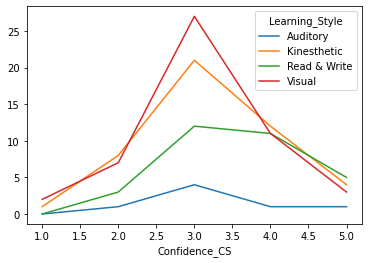

In [13]:
pd.crosstab(df_new['Confidence_CS'],df_new['Learning_Style']).plot();

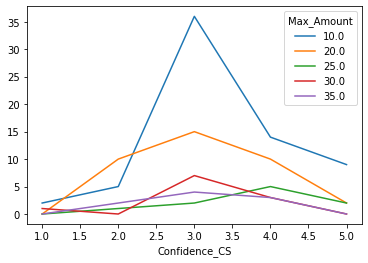

In [14]:
pd.crosstab(df_new['Confidence_CS'],df_new['Max_Amount']).plot();

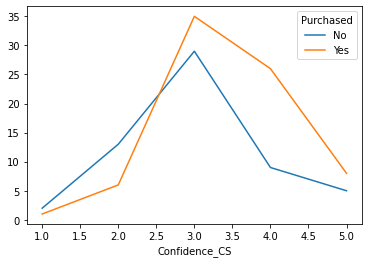

In [15]:
pd.crosstab(df_new['Confidence_CS'],df_new['Purchased']).plot();

## Apply Machine Learning Algo

In [16]:
# pip install category_encoders
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
# Split train into train & val
train_data, test = train_test_split(data, train_size=0.80, test_size=0.20, random_state=42)
train, val = train_test_split(train_data, train_size=0.80, test_size=0.20, random_state=42)

train.shape, val.shape, test.shape

((84, 23), (22, 23), (27, 23))

In [20]:
# The Max_Amount column is the target
target = 'Max_Amount'

# Get a dataframe with all train columns except the target & 'Timestamp', 'Username', 'Features_CS'
features = ['Background_CS', 'Confidence_CS', 'Purchased', 'Learning_Style',
            'Visual _Materials', 'Quiz_Importance', 'Cooperativness', 'youtube',
            'leet code', 'hackerrank', 'udemy', 'codesignal', 'frontend masters',
            'codecademy', 'google', 'algo expert', 'educative', 'lambda']

In [21]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [22]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(random_state=42))

# Fit on train
pipeline.fit(X_train, y_train)

# Score on train, test
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.9880952380952381
Validation Accuracy 0.36363636363636365


In [42]:
# Predict on test
y_pred = pipeline.predict(X_test)
y_test = y_test.to_numpy()

In [43]:
def accuracy(true_labels, predicted_labels):
    correct = 0
    for i in range(0, len(true_labels)):
        if true_labels[i] == predicted_labels[i]:
            correct += 1
    accuracy = correct/len(true_labels) * 100  #accuracy 
    return '%.2f' % accuracy
    
print("Test Accuracy: ", accuracy(y, y_pred))

Test Accuracy:  37.04


## Confusion Matrix

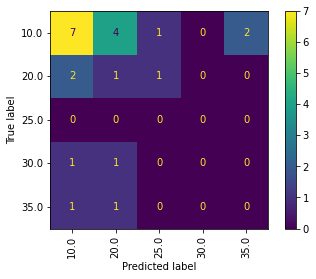

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_val, y_val, values_format='.0f', xticks_rotation='vertical');